In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loadind the dataset
df = pd.read_csv('dataset.csv')

In [2]:
# Print top 10 values
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [3]:
df = df[df['matchType'] == 'solo']
df.shape

(181943, 29)

### Data Cleaning

In [4]:
# Checking For null values
def getDfSummary(input_data):
    # Place your code here
    describe,output_data = input_data.describe().T,pd.DataFrame() 
    rows,columns = [input_data.isnull().sum(axis = 0), input_data.nunique(dropna=True), describe['mean'], describe['max'], describe['min'], 
              describe['std'], describe['25%'], describe['50%'], describe['75%']],['number_nan','number_distinct','mean','max','min','std','25%','50%','75%']
    for i in range(0,len(columns)):
        output_data[columns[i]] = rows[i]
    return output_data

getDfSummary(df)

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,181943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,168577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,5,0.055616,4.0,0.0,0.245147,0.0000,0.0000,0.0000
boosts,0,21,1.066048,24.0,0.0,1.825299,0.0000,0.0000,2.0000
damageDealt,0,16101,112.615132,2490.0,0.0,159.219277,0.0000,65.7300,159.6000
DBNOs,0,1,0.000000,0.0,0.0,0.000000,0.0000,0.0000,0.0000
headshotKills,0,19,0.223823,19.0,0.0,0.635332,0.0000,0.0000,0.0000
heals,0,44,1.012130,49.0,0.0,2.445998,0.0000,0.0000,1.0000
killPlace,0,100,46.172224,100.0,1.0,28.002309,21.0000,46.0000,70.0000


In [5]:
# Deleting the rows with null value.
# Since there is only one row with null value, we are deleting that row as replacing it with zero doesn't make any sense here.
df=df.dropna()
# df.shape


In [6]:
# Calculatin total distance travelled by the person and adding new column
df['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
36,269c3fc4a26935,3c07be51998e6f,ce9bc89b3ca08c,0,1,100.00,0,0,0,24,...,0.0,0,61.00,0,0,1528.0,3,0,0.8462,1589.00
63,73348483a5974b,1c8e486a643207,85601fe44d519b,0,0,17.81,0,0,0,79,...,129.3,0,0.00,0,0,471.9,3,1536,0.2245,601.20
69,caa1a36afeb7b2,c653cfca3b8b06,e5e181d2da0334,0,1,100.00,0,0,0,38,...,0.0,0,0.00,0,0,231.7,4,1500,0.1573,231.70
91,5fd62798396ca8,bb19a05801d30d,9e3c46f8acde82,0,0,36.00,0,0,0,84,...,0.0,0,0.00,0,0,292.6,1,0,0.1075,292.60
100,18d002b46b1abc,00a3f236559532,eccc44618c0442,0,1,236.00,0,0,7,7,...,0.0,0,0.00,0,0,1913.0,8,1557,0.9355,1913.00
121,d08ce24e7a7973,d57ed9de010a4e,1eda9747e31f1f,0,0,0.00,0,0,0,65,...,0.0,0,0.00,0,0,870.9,3,0,0.3878,870.90
157,50820adcefc866,212fc68772a25a,c9259d5a2a4f19,0,9,167.40,0,1,5,12,...,4146.0,0,0.00,0,0,3592.0,7,0,0.9222,7738.00
193,67e79b6a3aacc7,1c9169b09317bc,3a3f0763b3a692,0,0,79.20,0,0,0,30,...,8677.0,0,0.00,0,0,664.9,4,0,0.4444,9341.90
195,0beca796d57f7b,6e898c5fb00a39,b5da2e7bb438fc,0,1,144.30,0,0,0,23,...,0.0,0,0.00,0,0,1012.0,6,0,0.9263,1012.00
243,366d3745baac18,2c1169d472249a,0419c610115e42,0,2,158.00,0,0,6,21,...,0.0,0,62.62,0,0,2534.0,4,1512,0.8925,2596.62


In [7]:
# removing outliers
#1. kills if distance 0 is invalid
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['cheatkills'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))
display(df[df['cheatkills'] == True].shape)
df[df['cheatkills'] == True].head(10)
df.drop(df[df['cheatkills'] == True].index, inplace=True) 

# 2. No roadkills if vehicle distance is 0
# df['vehicleDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['cheatRoadkills'] = ((df['roadKills'] > 0) & (df['rideDistance'] == 0))
display(df[df['cheatRoadkills'] == True].shape)
df[df['cheatRoadkills'] == True].head(10)
df.drop(df[df['cheatRoadkills'] == True].index, inplace=True) 

# 3. Weapons acquired 0 and 

(21, 31)

(0, 32)

In [8]:
df = df.drop(['cheatkills', 'cheatRoadkills'], axis=1)

### Data Preparation

In [9]:
# Data preparation - 
# df.loc[df['matchType'].isin(["solo","solo-fpp"])]
# mapping the match types to integer values
nodes = list(set(df['matchType']))
nodes_dict = dict(zip(nodes, range(len(nodes))))
df = df.applymap(lambda x: nodes_dict.get(x) if x in nodes_dict else x)
nodes = list(set(df['matchType']))
getDfSummary(df)


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
Id,0,181922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groupId,0,168557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
matchId,0,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,0,5,0.055623,4.0,0.0,0.245161,0.0000,0.0000,0.0000
boosts,0,21,1.066171,24.0,0.0,1.825369,0.0000,0.0000,2.0000
damageDealt,0,16101,112.617184,2490.0,0.0,159.228280,0.0000,65.7000,159.6000
DBNOs,0,1,0.000000,0.0,0.0,0.000000,0.0000,0.0000,0.0000
headshotKills,0,19,0.223805,19.0,0.0,0.635345,0.0000,0.0000,0.0000
heals,0,44,1.012247,49.0,0.0,2.446115,0.0000,0.0000,1.0000
killPlace,0,100,46.172640,100.0,1.0,28.003862,21.0000,46.0000,70.0000


In [10]:
# col_list = list(df)
# col_list[14],col_list[28] = col_list[28], col_list[14]
# df.columns = col_list
# list(df)


In [11]:
# train_df = df.sample(frac = 0.8,replace = False, random_state = 1)
# test_df = df.loc[:,df.columns != 'matchDuration']
# list(test_df)

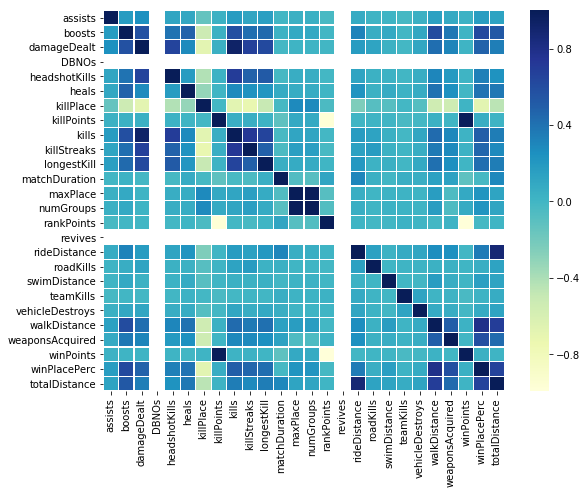

In [12]:
drop_cols = ['Id', 'groupId', 'matchId', 'matchType']
corr_cols = [col for col in df.columns if col not in drop_cols]
corr = df[corr_cols].corr()

plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()
# print(corr)


In [13]:
# finding top 5 correlation with winning
top_five = corr.nlargest(10,'winPlacePerc')
top_five = top_five['winPlacePerc']
top_five= top_five.to_frame().transpose()
top_five

,winPlacePerc,walkDistance,totalDistance,boosts,weaponsAcquired,kills,damageDealt,killStreaks,longestKill,heals
winPlacePerc,1.0,0.796117,0.660272,0.626024,0.5903,0.499903,0.482097,0.45666,0.418672,0.395773


### Decision Tree Classifier

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

df = df.head(50000)
# Converting float to integer to treat continuous error
lab_enc = preprocessing.LabelEncoder()
totalDistance = lab_enc.fit_transform(df.totalDistance)

X = df[['boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','killPlace','winPlacePerc']]
Y = totalDistance
train_data,test_data, train_target,test_target = train_test_split(X, Y, train_size=0.8)
# Testing and training

from sklearn.tree import DecisionTreeRegressor

# train_df=df.sample(frac=0.8,random_state=200)
# test_df = df.loc[~df.index.isin(train_df.index)]

decision_tree_regressor = DecisionTreeRegressor(criterion = 'mae')
# train_data,train_target = train_df[['boosts','weaponsAcquired','damageDealt','heals','kills','longestKill','killStreaks','killPlace','winPlacePerc']],totalDistance
decision_tree_regressor.fit(train_data, train_target)


/Users/AnshulSharma/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
train_data

,boosts,weaponsAcquired,damageDealt,heals,kills,longestKill,killStreaks,killPlace,winPlacePerc
491592,0,1,0.00,0,0,0.0000,0,92,0.0412
805756,0,0,0.00,0,0,0.0000,0,92,0.0213
230602,0,2,0.00,0,0,0.0000,0,77,0.2292
736732,0,4,0.00,0,0,0.0000,0,79,0.2577
964492,0,4,0.00,0,0,0.0000,0,61,0.4835
801149,0,2,89.82,0,1,67.9700,1,33,0.4149
358708,0,7,123.20,0,1,0.0000,1,28,0.5532
888466,2,8,390.70,1,2,12.5900,1,13,0.9684
547135,0,1,0.00,0,0,0.0000,0,85,0.1146
768964,4,5,125.80,2,1,21.3700,1,24,0.9574


In [16]:
from matplotlib import pyplot as plt

<class 'pandas.core.frame.DataFrame'>


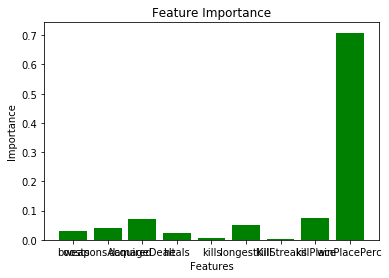

In [17]:
featurelength=np.arange(len(list(train_data)))
imp=pd.DataFrame({"Features":list(train_data),"Importance":decision_tree_regressor.feature_importances_})
# imp = sorted((dt_clf.feature_importances_), reverse = True)
print(type(imp))
# print(imp)
# print('-'*10)
# print(imp.sort_values(by='Importance',ascending=False))
plt.bar(featurelength,imp["Importance"], color = "green")
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(featurelength,imp["Features"])
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

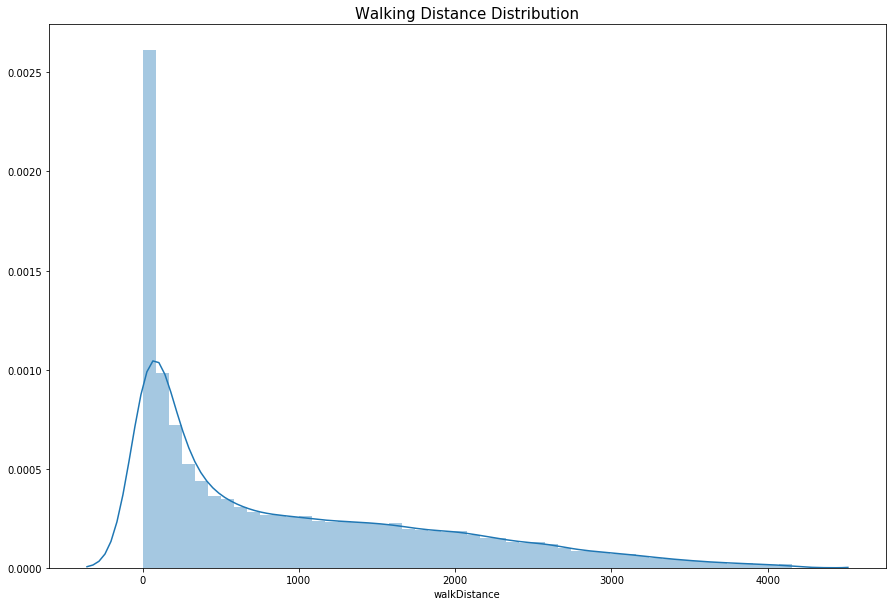

In [22]:
# Correlation
data = df.copy()
data = data[data['walkDistance'] < df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

99th percentile of walk distance is 4157.030000000006m


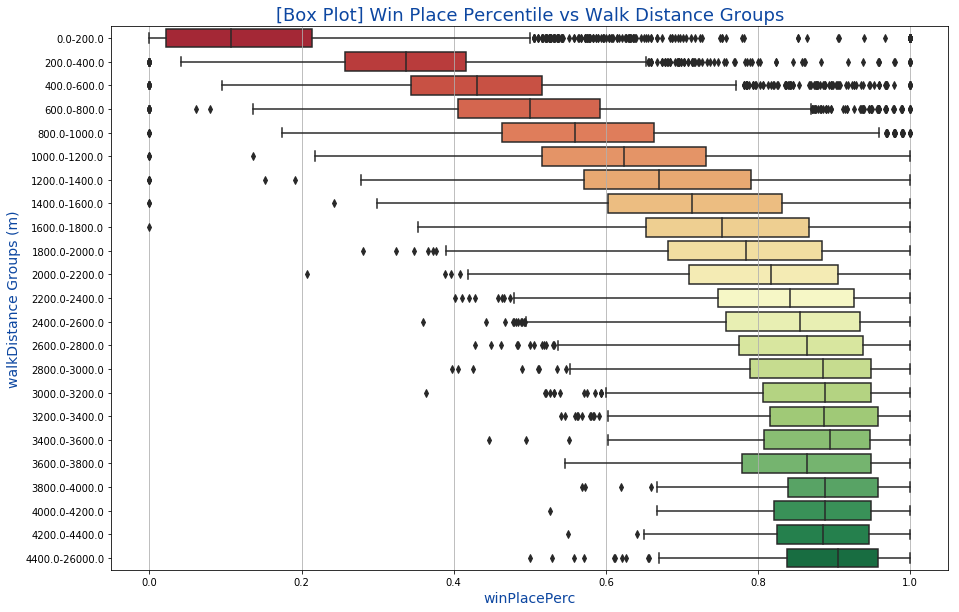

In [18]:
kills = df[['walkDistance','winPlacePerc']].copy()

print("99th percentile of walk distance is {}m".format(kills['walkDistance'].quantile(0.99)))

cut_range = np.linspace(0,4400,23)
cut_range = np.append(cut_range, 26000)
kills['walkDistanceGrouping'] = pd.cut(kills['walkDistance'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:23], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="winPlacePerc", y="walkDistanceGrouping", data=kills, ax=ax, palette=sns.color_palette("RdYlGn", 23))
ax.set_xlabel('winPlacePerc', size=14, color="#0D47A1")
ax.set_ylabel('walkDistance Groups (m)', size=14, color="#0D47A1")
ax.set_title('[Box Plot] Win Place Percentile vs Walk Distance Groups', size=18, color="#0D47A1")
plt.gca().xaxis.grid(True)
plt.show()

In [19]:
#Place your code here 
imp = imp.sort_values(by='Importance',ascending=False)
#print(imp)
#print('-'*100)
imp_cols = list(df[imp[:]["Features"]])
#imp_cols = cdf[list(imp['Features'][:3])]
# print(imp_cols)

imp_cols.extend(["totalDistance"])
corr_zoom = df[imp_cols].corr()
corr_zoom

,winPlacePerc,killPlace,damageDealt,longestKill,weaponsAcquired,boosts,heals,kills,killStreaks,totalDistance
winPlacePerc,1.000000,-0.675640,0.478034,0.415562,0.585808,0.628711,0.398868,0.499577,0.458866,0.662200
killPlace,-0.675640,1.000000,-0.676537,-0.491318,-0.531696,-0.528885,-0.325215,-0.671140,-0.722314,-0.452697
damageDealt,0.478034,-0.676537,1.000000,0.618673,0.305479,0.573539,0.289444,0.929016,0.673443,0.331664
longestKill,0.415562,-0.491318,0.618673,1.000000,0.248629,0.441654,0.217795,0.655367,0.493434,0.344289
weaponsAcquired,0.585808,-0.531696,0.305479,0.248629,1.000000,0.374027,0.251411,0.293832,0.287154,0.432726
boosts,0.628711,-0.528885,0.573539,0.441654,0.374027,1.000000,0.485967,0.593570,0.421514,0.525603
heals,0.398868,-0.325215,0.289444,0.217795,0.251411,0.485967,1.000000,0.292957,0.250260,0.375750
kills,0.499577,-0.671140,0.929016,0.655367,0.293832,0.593570,0.292957,1.000000,0.731981,0.342441
killStreaks,0.458866,-0.722314,0.673443,0.493434,0.287154,0.421514,0.250260,0.731981,1.000000,0.290878
totalDistance,0.662200,-0.452697,0.331664,0.344289,0.432726,0.525603,0.375750,0.342441,0.290878,1.000000


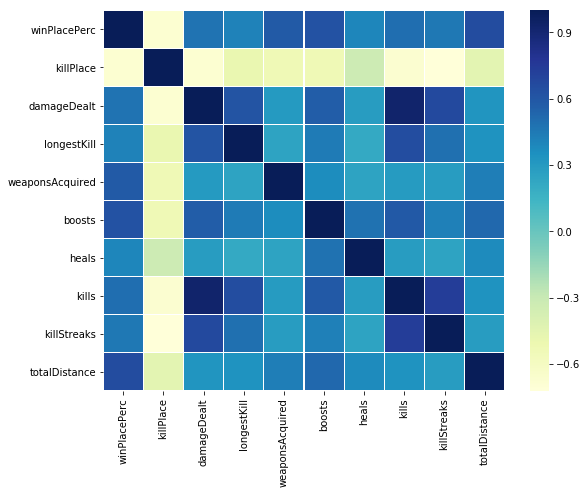

In [20]:
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_zoom,
    xticklabels=corr_zoom.columns.values,
    yticklabels=corr_zoom.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="YlGnBu"
)
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error
y_pred_train = decision_tree_regressor.predict(train_data)

# x_t = test_data[list(train_data)]
# y_t = test_df['totalDistance']
y_pred_test = decision_tree_regressor.predict(test_data)

accuracy_train = mean_absolute_error(train_target)
accuracy_test = mean_absolute_error(test_target,y_pred_test)

print("Accuracy on training data is", accuracy_train)
print("Accuracy on testing data is", accuracy_test)

score_train = decision_tree_regressor.score(train_data,train_target)
score_test = decision_tree_regressor.score(test_data,test_target)

print("Score on training data is", score_train)
print("Score on testing data is", score_test)

TypeError: mean_absolute_error() missing 1 required positional argument: 'y_pred'

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtf

In [ ]:
# Random forest
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
# Train basic model
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)
y_pred = m1.predict(X_valid)
print("Training Accuracy = ", m1.score(X_train, y_train))
print("Test Accuracy = ", m1.score(X_valid, y_valid))
